IMPORTING THE IRIS DATASET

A dataset cantaining sepal length,width and petal length and width of three types of iris species. The main purpose of logistic regression algorithm is classification analysis. The data is collected of 50 samples of each the 3 species of Iris flowers

ATTRIBUTES

It has 6 columns

Id: A unique identifier

SepalLengthCm= Sepal length

SepalWidthCm= Sepal Width

PetalLengthCm= Petal Length in cm

PetalWidthCm= Petal Width in cm

Species= Three Categories of Species; iris-setosa,Iris-virginica and iris-virginica

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LIBRARIES

Numpy: for mathematical operations

Pandas: for loading datasets and performing operations on dataframes

matplotlib: visualization library

seaborn: advanced visual library built on top of matplotlib

In [194]:
df=pd.read_csv('Iris.csv')
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

Printing the shape of dataframe-no of rows and columns

In [195]:
df.shape

(150, 6)

Data Preprocessing

In [196]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [197]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Plotting the types of flowers as a scatter plot

C:\Users\awans\AppData\Local\Temp\ipykernel_5216\27379461.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', loc='upper left')


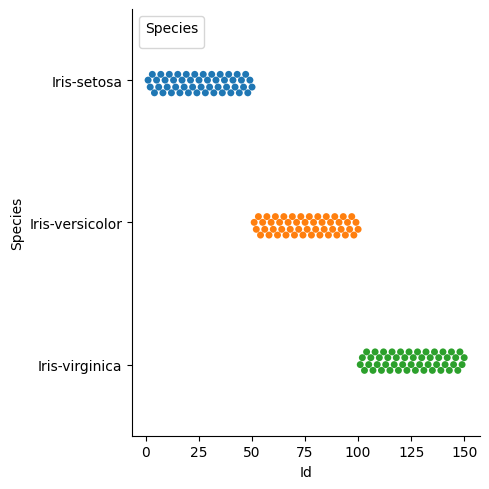

In [198]:
sns.catplot(x='Id', y='Species', data=df, kind='swarm', hue='Species')
plt.legend(title='Species', loc='upper left')
plt.show()

Droping Id columns 

In [199]:
df.drop("Id",axis=1,inplace=True) 

Making a Heatmap to find Correlation of Numerical Columns

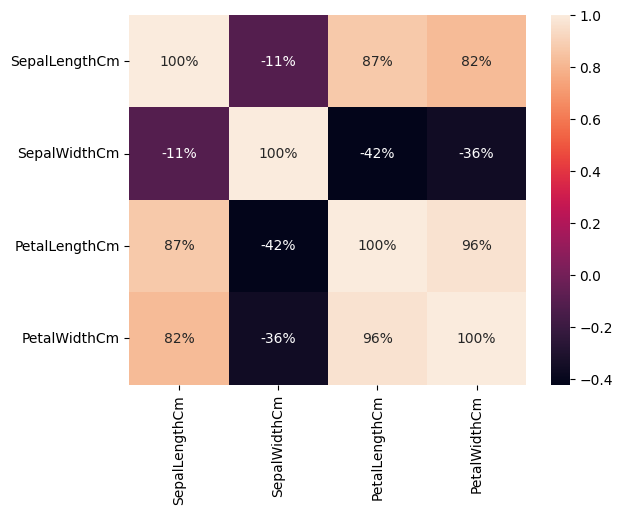

In [200]:
df_corr=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] 
sns.heatmap(df_corr.corr(),annot=True,fmt=".0%")
plt.show()

SepalLengthcm is more correlated with PetalLengthCm

PetalWidthCm is more correlated with PetalLengthCm

In [201]:
df_corr.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Making a Pairplot to visualize the numerous trends between the variables

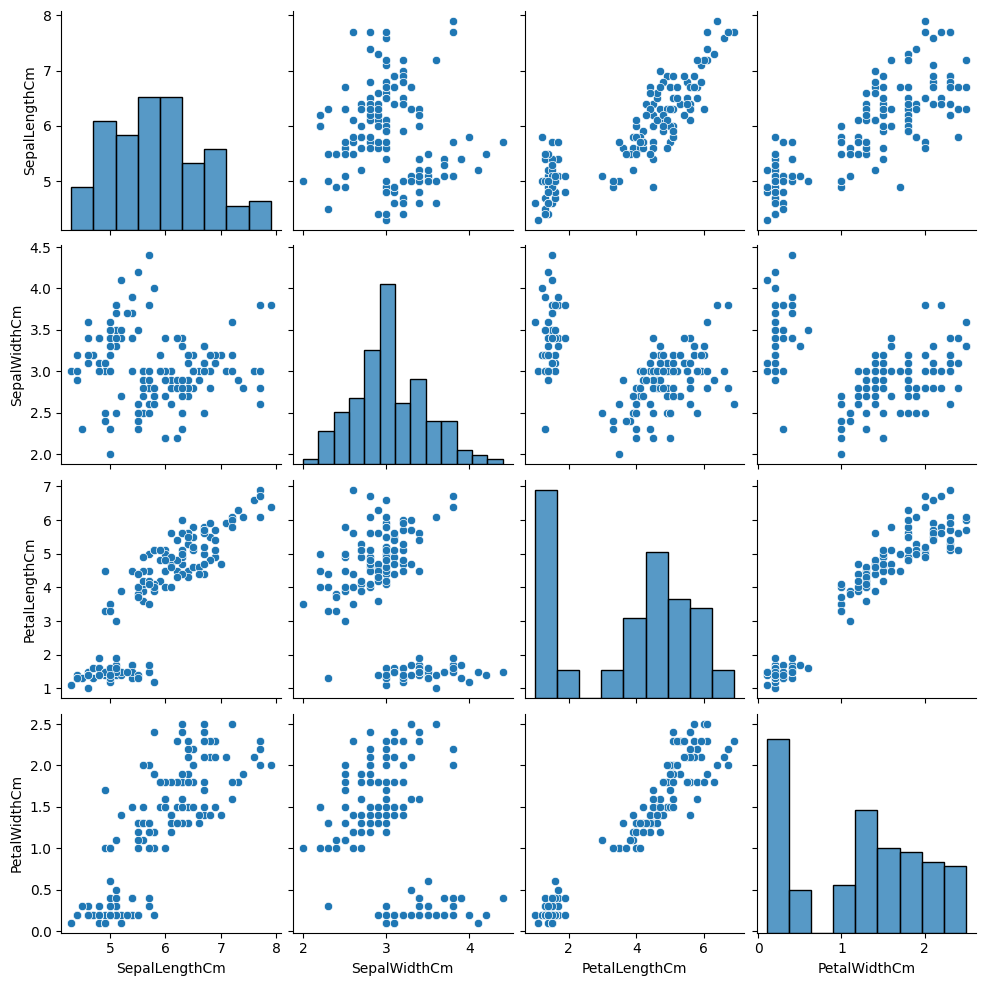

In [202]:
sns.pairplot(df_corr)

In [203]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Counting the no of samples of each species

In [204]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

For Logistic Regression, we have two states 1 or 0 . Logistic Regression is a category of Classification. we create a category column to assign categories to the flower types. If species is Iris-versicolor assign it 1 , for other types assign 0

In [205]:
df_corr['Category'] = (df['Species'] == 'Iris-versicolor').astype(int) 

Making two dataframes

X: Cantaining the input features which will be provided to train the model . these are the independent variables

y: Cantaining the output features which will be predicted. these are the dependent variables.


In [215]:
X = df_corr[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df_corr['Category'].values


Dividing the dataset into test and train dataframes

Test is used to train the model it cantains 70% data

Train is used to check the accuracy of the model it cantains 30% data


In [207]:
index=int(0.7*len(X))
X_train, X_test = X[:index], X[index:]
y_train, y_test = y[:index], y[index:]



For Logistic Regression , we need three function

1: Sigmoid Function -> it maps any real-valued number to a value between 1 and 0. the value obtained after applying the sigmoid function is always between 0 and 1. 

2: Parameters Function -> returns a matrix of zeros

3: Cost Function -> Error Function, is a mathematical function that measures the difference between the model's predictions and the actual true labels. It is used to evaluate the performance of a model and to guide the learning process during training. Lower the value of cost function, higher the accuracy the cost function is lowered using the gradiant descent. Cost is calculated by 

Cost = -1/m ∑ [y*log(h) + (1-y)*log(1-h)]

m= the length of the data

y= the input data

h=  predicted probability h calculated using the sigmoid function and the dot product of X (feature) and theta (weight vector).

y: the target variables 

4: Gradiant Descent -> it lower the cost value 

   X: feature matrix (array)

   y: target vector (array)
  
   theta: initial model parameters (array)
   
   rate: learning rate 

   n: number of iterations

   

In [220]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def parameters(dim):
    return np.zeros(dim)

def compute_cost(X, y, theta):
    m=len(y)
    h=sigmoid(np.dot(X, theta))
    cost=-1/m*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    return cost
def gradient_descent(X, y, theta, rate, n):
    m = len(y)
    for i in range(n):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= rate * gradient
        cost = compute_cost(X, y, theta)  
        print(f"Iteration {i+1}, Cost: {cost:.4f}") 
    return theta
def predict(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)
n_features = X.shape[1]



Initializing model parameters

Running gradient descent on the training data to update the model parameters

Making predictions on the test data using the updated model parameters

Converting predicted probabilities to labels

Printing the predicted labels

In [218]:
rate=0.01
n=1000
ini = parameters(n_features)
theta = gradient_descent(X_train, y_train, ini,rate, n)
predictions = predict(X_test, theta)
predicted_label = (predictions >= 0.5).astype(int)
print(predicted_label)

Iteration 1, Cost: 0.6894
Iteration 2, Cost: 0.6858
Iteration 3, Cost: 0.6823
Iteration 4, Cost: 0.6789
Iteration 5, Cost: 0.6755
Iteration 6, Cost: 0.6723
Iteration 7, Cost: 0.6691
Iteration 8, Cost: 0.6659
Iteration 9, Cost: 0.6629
Iteration 10, Cost: 0.6598
Iteration 11, Cost: 0.6568
Iteration 12, Cost: 0.6538
Iteration 13, Cost: 0.6509
Iteration 14, Cost: 0.6480
Iteration 15, Cost: 0.6451
Iteration 16, Cost: 0.6422
Iteration 17, Cost: 0.6394
Iteration 18, Cost: 0.6366
Iteration 19, Cost: 0.6339
Iteration 20, Cost: 0.6312
Iteration 21, Cost: 0.6285
Iteration 22, Cost: 0.6258
Iteration 23, Cost: 0.6231
Iteration 24, Cost: 0.6205
Iteration 25, Cost: 0.6179
Iteration 26, Cost: 0.6154
Iteration 27, Cost: 0.6128
Iteration 28, Cost: 0.6103
Iteration 29, Cost: 0.6078
Iteration 30, Cost: 0.6053
Iteration 31, Cost: 0.6029
Iteration 32, Cost: 0.6005
Iteration 33, Cost: 0.5981
Iteration 34, Cost: 0.5957
Iteration 35, Cost: 0.5934
Iteration 36, Cost: 0.5911
Iteration 37, Cost: 0.5887
Iteration 

C:\Users\awans\AppData\Local\Temp\ipykernel_5216\2456274720.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


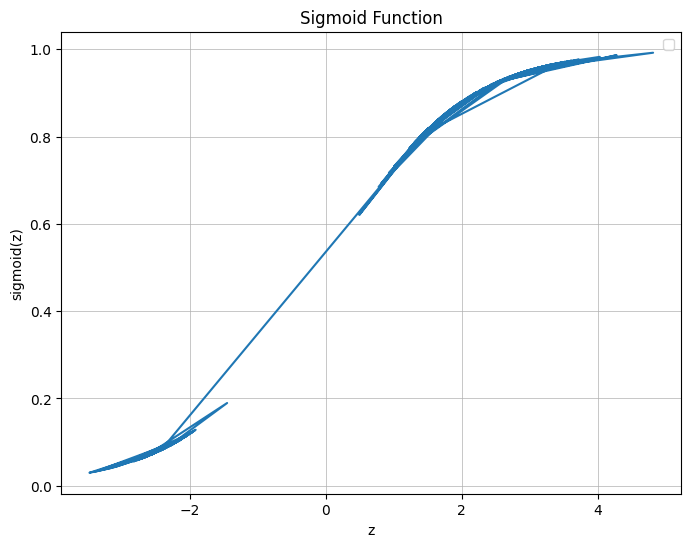

In [221]:
z = np.dot(X, theta)
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.legend()

# Show plot
plt.show()
